# Step 1: Greek Computer Attitudes Scale

Import libraries

In [1]:
import numpy as np
import pandas as pd
# import plot_likert
import matplotlib.pyplot as plt

from scipy import stats
from pandas.api.types import CategoricalDtype

Load data

In [2]:
BFdata= pd.read_csv("step2-rawdata-clean.csv", delimiter=";")

In [3]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [4]:
techExperience_dtype = CategoricalDtype(ordered=True, categories=[1,2,3,4,5])
BFdata["G01Q12_encoded"] = BFdata["G01Q12"]
BFdata["G01Q12"] = BFdata["G01Q12"].astype(techExperience_dtype)

In [5]:
answerList = ["Pas du tout d'accord","Pas d'accord","Un peu d'accord","D'accord","Tout à fait d'accord"]
likert_dtype = CategoricalDtype(categories=answerList, ordered=True)

scale = {"Pas du tout d'accord":1,"Pas d'accord":2,"Un peu d'accord":3,"D'accord":4,"Tout à fait d'accord":5}
scaleInverted = {"Pas du tout d'accord":5,"Pas d'accord":4,"Un peu d'accord":3,"D'accord":2,"Tout à fait d'accord":1}

ConfianceNormalScaleQuestionID = [1,2,4,5,6,8,10,13,14]
ConfianceInvertedScaleQuestionID = [3,7,9,11,12,15]

AffectionNormalScaleQuestionID = [3,7,8,10]
AffectionInvertedScaleQuestionID = [1,2,4,5,6,9]

CognitiveNormalScaleQuestionID = [5]
CognitiveInvertedScaleQuestionID = [1,2,3,4]

In [6]:
# Confiance
for i in ConfianceNormalScaleQuestionID:
    if(i<10):
        BFdata["G01Confiance[SQ00"+str(i)+"]_encoded"] = BFdata["G01Confiance[SQ00"+str(i)+"]"].replace(scale)
        BFdata["G01Confiance[SQ00"+str(i)+"]"] = BFdata["G01Confiance[SQ00"+str(i)+"]"].astype(likert_dtype)
    else:
        BFdata["G01Confiance[SQ0"+str(i)+"]_encoded"] = BFdata["G01Confiance[SQ0"+str(i)+"]"].replace(scale)
        BFdata["G01Confiance[SQ0"+str(i)+"]"] = BFdata["G01Confiance[SQ0"+str(i)+"]"].astype(likert_dtype)

for i in ConfianceInvertedScaleQuestionID:
    if(i<10):
        BFdata["G01Confiance[SQ00"+str(i)+"]_encoded"] = BFdata["G01Confiance[SQ00"+str(i)+"]"].replace(scaleInverted)
        BFdata["G01Confiance[SQ00"+str(i)+"]"] = BFdata["G01Confiance[SQ00"+str(i)+"]"].astype(likert_dtype)
    else:
        BFdata["G01Confiance[SQ0"+str(i)+"]_encoded"] = BFdata["G01Confiance[SQ0"+str(i)+"]"].replace(scale)
        BFdata["G01Confiance[SQ0"+str(i)+"]"] = BFdata["G01Confiance[SQ0"+str(i)+"]"].astype(likert_dtype)

# Affection
for i in AffectionNormalScaleQuestionID:
    if(i<10):
        BFdata["G02Affection[SQ00"+str(i)+"]_encoded"] = BFdata["G02Affection[SQ00"+str(i)+"]"].replace(scale)
        BFdata["G02Affection[SQ00"+str(i)+"]"] = BFdata["G02Affection[SQ00"+str(i)+"]"].astype(likert_dtype)
    else:
        BFdata["G02Affection[SQ0"+str(i)+"]_encoded"] = BFdata["G02Affection[SQ0"+str(i)+"]"].replace(scale)
        BFdata["G02Affection[SQ0"+str(i)+"]"] = BFdata["G02Affection[SQ0"+str(i)+"]"].astype(likert_dtype)

for i in AffectionInvertedScaleQuestionID:
    if(i<10):
        BFdata["G02Affection[SQ00"+str(i)+"]_encoded"] = BFdata["G02Affection[SQ00"+str(i)+"]"].replace(scaleInverted)
        BFdata["G02Affection[SQ00"+str(i)+"]"] = BFdata["G02Affection[SQ00"+str(i)+"]"].astype(likert_dtype)
    else:
        BFdata["G02Affection[SQ0"+str(i)+"]_encoded"] = BFdata["G02Affection[SQ0"+str(i)+"]"].replace(scale)
        BFdata["G02Affection[SQ0"+str(i)+"]"] = BFdata["G02Affection[SQ0"+str(i)+"]"].astype(likert_dtype)



# Cognitive
for i in CognitiveNormalScaleQuestionID:
    if(i<10):
        BFdata["G03Cognitive[SQ00"+str(i)+"]_encoded"] = BFdata["G03Cognitive[SQ00"+str(i)+"]"].replace(scale)
        BFdata["G03Cognitive[SQ00"+str(i)+"]"] = BFdata["G03Cognitive[SQ00"+str(i)+"]"].astype(likert_dtype)
    else:
        BFdata["G03Cognitive[SQ0"+str(i)+"]_encoded"] = BFdata["G03Cognitive[SQ0"+str(i)+"]"].replace(scale)
        BFdata["G03Cognitive[SQ0"+str(i)+"]"] = BFdata["G03Cognitive[SQ0"+str(i)+"]"].astype(likert_dtype)

for i in CognitiveInvertedScaleQuestionID:
    if(i<10):
        BFdata["G03Cognitive[SQ00"+str(i)+"]_encoded"] = BFdata["G03Cognitive[SQ00"+str(i)+"]"].replace(scaleInverted)
        BFdata["G03Cognitive[SQ00"+str(i)+"]"] = BFdata["G03Cognitive[SQ00"+str(i)+"]"].astype(likert_dtype)
    else:
        BFdata["G03Cognitive[SQ0"+str(i)+"]_encoded"] = BFdata["G03Cognitive[SQ0"+str(i)+"]"].replace(scaleInverted)
        BFdata["G03Cognitive[SQ0"+str(i)+"]"] = BFdata["G03Cognitive[SQ0"+str(i)+"]"].astype(likert_dtype)


## Demographic data

### Gender repartition 

In [7]:
BFdata.groupby(["G05Q07"])["G01Q08"].describe()

,count,mean,std,min,25%,50%,75%,max
G05Q07,,,,,,,,
Femme,5.0,37.400000,10.737784,27.0,29.0,34.0,45.0,52.0
Homme,9.0,32.111111,10.925251,22.0,23.0,28.0,35.0,53.0


### Age repartition

In [8]:
BFdata["G01Q08"].describe()

count    14.000000
mean     34.000000
std      10.763185
min      22.000000
25%      25.500000
50%      31.500000
75%      42.500000
max      53.000000
Name: G01Q08, dtype: float64

In [9]:
BFdata["Age_enco"] = pd.cut(BFdata["G01Q08"],bins=[0,25,40,99],labels=['<25 y.o','25 to 40 y.o.','>40 y.o.'])

In [10]:
BFdata["Age_enco"].value_counts()

25 to 40 y.o.    6
<25 y.o          4
>40 y.o.         4
Name: Age_enco, dtype: int64

### Experience

In [11]:
BFdata[ "G01Q10"]

0     25
1     23
2      7
3     22
4      2
5      5
6      0
7      0
8      5
9     10
10    15
11     7
12     6
13     0
Name: G01Q10, dtype: int64

In [12]:
BFdata["G01Q10"].describe()

count    14.000000
mean      9.071429
std       8.765880
min       0.000000
25%       2.750000
50%       6.500000
75%      13.750000
max      25.000000
Name: G01Q10, dtype: float64

### Technical experience

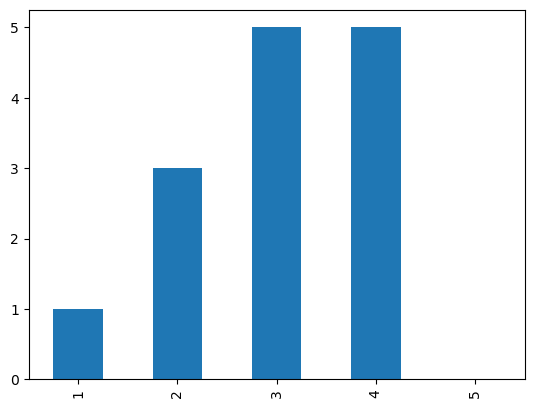

In [13]:
BFdata["G01Q12"].value_counts().sort_index().plot(kind="bar")
plt.show()

In [14]:
BFdata["G01Q12_encoded"].value_counts()

4    5
3    5
2    3
1    1
Name: G01Q12_encoded, dtype: int64

## Greek Computer Attitudes Scale

<AxesSubplot:>

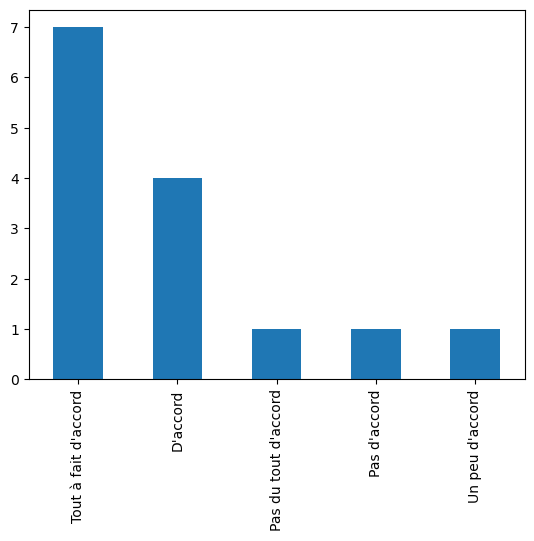

In [15]:
BFdata["G01Confiance[SQ001]"].value_counts().plot(kind="bar")

In [16]:
BFdata["G01Confiance[SQ001]"].sort_values().value_counts()

Tout à fait d'accord    7
D'accord                4
Pas du tout d'accord    1
Pas d'accord            1
Un peu d'accord         1
Name: G01Confiance[SQ001], dtype: int64

### Overall

In [17]:
BFdata["Score"] = BFdata["G01Confiance[SQ001]_encoded"] + BFdata["G01Confiance[SQ002]_encoded"] + BFdata["G01Confiance[SQ003]_encoded"] + BFdata["G01Confiance[SQ004]_encoded"] + BFdata["G01Confiance[SQ005]_encoded"] + BFdata["G01Confiance[SQ006]_encoded"] + BFdata["G01Confiance[SQ007]_encoded"] + BFdata["G01Confiance[SQ008]_encoded"] + BFdata["G01Confiance[SQ009]_encoded"] + BFdata["G01Confiance[SQ010]_encoded"] + BFdata["G01Confiance[SQ011]_encoded"] + BFdata["G01Confiance[SQ012]_encoded"] + BFdata["G01Confiance[SQ013]_encoded"] + BFdata["G01Confiance[SQ014]_encoded"] + BFdata["G01Confiance[SQ015]_encoded"] + BFdata["G02Affection[SQ001]_encoded"] + BFdata["G02Affection[SQ002]_encoded"] + BFdata["G02Affection[SQ003]_encoded"] + BFdata["G02Affection[SQ004]_encoded"] + BFdata["G02Affection[SQ005]_encoded"] + BFdata["G02Affection[SQ006]_encoded"] + BFdata["G02Affection[SQ007]_encoded"] + BFdata["G02Affection[SQ008]_encoded"] + BFdata["G02Affection[SQ009]_encoded"] + BFdata["G02Affection[SQ010]_encoded"] + BFdata["G02Affection[SQ001]_encoded"] + BFdata["G03Cognitive[SQ001]_encoded"] + BFdata["G03Cognitive[SQ002]_encoded"] + BFdata["G03Cognitive[SQ003]_encoded"] + BFdata["G03Cognitive[SQ004]_encoded"] + BFdata["G03Cognitive[SQ005]_encoded"]

In [18]:
BFdata.describe()[["Score"]]

,Score
count,14.000000
mean,119.785714
std,11.355640
min,90.000000
25%,115.750000
50%,120.500000
75%,127.750000
max,133.000000


#### Overall score by gender

In [19]:
BFdata.groupby(["G05Q07"]).describe()[["Score"]]

Score                                                          
       count        mean        std    min    25%    50%    75%    max
G05Q07                                                                
Femme    5.0  111.800000  12.930584   90.0  110.0  118.0  120.0  121.0
Homme    9.0  124.222222   7.996527  111.0  119.0  124.0  131.0  133.0

In [20]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Score"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Score"], equal_var=False)

Ttest_indResult(statistic=-1.95088186814489, pvalue=0.10102678334372646)

According to the results of symmetric Student test (p>0.05), mean score at the Greek Computer Attitudes Scale is not different between men and women

In [21]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Score"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Score"], equal_var=False, alternative="less")

Ttest_indResult(statistic=-1.95088186814489, pvalue=0.05051339167186323)

In [22]:
stats.mannwhitneyu(BFdata[BFdata["G05Q07"] == "Femme"]["Score"], BFdata[BFdata["G05Q07"] == "Homme"]["Score"], method="exact")

MannwhitneyuResult(statistic=8.0, pvalue=0.05994005994005994)

In [23]:
stats.mannwhitneyu(BFdata[BFdata["G05Q07"] == "Femme"]["Score"], BFdata[BFdata["G05Q07"] == "Homme"]["Score"], method="exact", alternative="less")

MannwhitneyuResult(statistic=8.0, pvalue=0.02997002997002997)

In [77]:
cohend(BFdata[BFdata["G05Q07"] == "Homme"]["Score"], BFdata[BFdata["G05Q07"] == "Femme"]["Score"])

1.2525166071728633

#### Overall score by age

In [24]:
BFdata.groupby(["Age_enco"]).describe()[["Score"]]

Score                                                        
              count    mean        std    min     25%    50%     75%    max
Age_enco                                                                   
<25 y.o         4.0  124.50   7.187953  115.0  121.00  126.0  129.50  131.0
25 to 40 y.o.   6.0  124.00   7.042727  118.0  119.25  120.5  130.00  133.0
>40 y.o.        4.0  108.75  14.032700   90.0  105.00  110.5  114.25  124.0

In [25]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Score"], b=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Score"], equal_var=False)

Ttest_indResult(statistic=0.10863577182740045, pvalue=0.9167795397582554)

In [26]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Score"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Score"], equal_var=False,)

Ttest_indResult(statistic=2.0111833141379454, pvalue=0.11422349584843951)

In [27]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Score"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Score"], equal_var=False,)

Ttest_indResult(statistic=1.997903695208268, pvalue=0.10891613883473408)

In [28]:
stats.kruskal(BFdata[BFdata["Age_enco"] == "<25 y.o"]["Score"], BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Score"], BFdata[BFdata["Age_enco"] == ">40 y.o."]["Score"])

KruskalResult(statistic=3.9324522760646112, pvalue=0.13998414146593127)

#### Overall Score by technical group

In [29]:
BFdata.groupby(["G01Q12_encoded"]).describe()["Score"]

,count,mean,std,min,25%,50%,75%,max
G01Q12_encoded,,,,,,,,
1,1.0,119.000000,NaN,119.0,119.0,119.0,119.0,119.0
2,3.0,106.333333,14.571662,90.0,100.5,111.0,114.5,118.0
3,5.0,122.000000,5.830952,115.0,120.0,121.0,123.0,131.0
4,5.0,125.800000,9.576012,110.0,124.0,129.0,133.0,133.0


In [30]:
stats.f_oneway( BFdata.loc[BFdata["G01Q12_encoded"] ==2]['Score'], BFdata.loc[BFdata["G01Q12_encoded"] ==3]['Score'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Score']  )

F_onewayResult(statistic=4.033706374131908, pvalue=0.051942179601186876)

In [31]:
stats.kruskal(BFdata.loc[BFdata["G01Q12_encoded"] ==2]['Score'], BFdata.loc[BFdata["G01Q12_encoded"] ==3]['Score'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Score']  )

KruskalResult(statistic=4.78677685950413, pvalue=0.0913197285579568)

In [78]:
stats.kruskal(BFdata.loc[BFdata["G01Q12_encoded"] ==3]['Score'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Score'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Score']  )

KruskalResult(statistic=1.8581352833638003, pvalue=0.3949217473499112)

### Confidence

In [32]:
BFdata["Confiance"] = BFdata["G01Confiance[SQ001]_encoded"] + BFdata["G01Confiance[SQ002]_encoded"] + BFdata["G01Confiance[SQ003]_encoded"] + BFdata["G01Confiance[SQ004]_encoded"] + BFdata["G01Confiance[SQ005]_encoded"] + BFdata["G01Confiance[SQ006]_encoded"] + BFdata["G01Confiance[SQ007]_encoded"] + BFdata["G01Confiance[SQ008]_encoded"] + BFdata["G01Confiance[SQ009]_encoded"] + BFdata["G01Confiance[SQ010]_encoded"] + BFdata["G01Confiance[SQ011]_encoded"] + BFdata["G01Confiance[SQ012]_encoded"] + BFdata["G01Confiance[SQ013]_encoded"] + BFdata["G01Confiance[SQ014]_encoded"] + BFdata["G01Confiance[SQ015]_encoded"]

In [33]:
BFdata.describe()[["Confiance"]]

,Confiance
count,14.000000
mean,52.428571
std,6.381636
min,38.000000
25%,50.250000
50%,53.000000
75%,58.000000
max,60.000000


#### Confidence by gender

In [34]:
BFdata.groupby(["G05Q07"]).describe()[["Confiance"]]

Confiance                                                   
           count       mean       std   min   25%   50%   75%   max
G05Q07                                                             
Femme        5.0  48.200000  6.833740  38.0  45.0  50.0  53.0  55.0
Homme        9.0  54.777778  5.044249  45.0  51.0  58.0  58.0  60.0

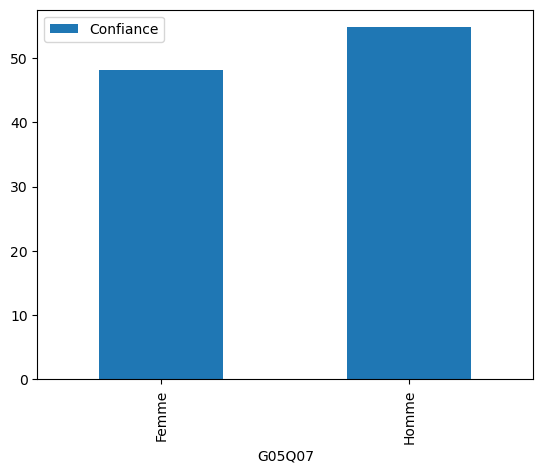

In [35]:
BFdata.groupby(["G05Q07"]).mean()[["Confiance"]].plot(kind="bar")
plt.show()

In [36]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Confiance"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Confiance"], equal_var=False)

Ttest_indResult(statistic=-1.885752008300202, pvalue=0.10459694289046129)

According to the results of symmetric T-test (p>0.05), the null hypothesis of mean equality can not be rejected.

In [37]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Confiance"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Confiance"], equal_var=False, alternative="less")

Ttest_indResult(statistic=-1.885752008300202, pvalue=0.05229847144523064)

According to the results of unilateral T-test assuming women mean lower than men mean, the null hypothesis cannot be rejected. 

In [38]:
stats.mannwhitneyu(BFdata[BFdata["G05Q07"] == "Femme"]["Confiance"], BFdata[BFdata["G05Q07"] == "Homme"]["Confiance"], method="exact", alternative="less")

MannwhitneyuResult(statistic=9.0, pvalue=0.041458541458541456)

In [79]:
cohend(BFdata[BFdata["G05Q07"] == "Homme"]["Confiance"], BFdata[BFdata["G05Q07"] == "Femme"]["Confiance"])

1.1532929520260278

#### Confidence score by age

In [39]:
BFdata.groupby(["Age_enco"]).describe()[["Confiance"]]

Confiance                                                 
                  count   mean       std   min    25%   50%    75%   max
Age_enco                                                                
<25 y.o             4.0  56.50  3.696846  51.0  56.25  58.0  58.25  59.0
25 to 40 y.o.       6.0  54.50  3.937004  50.0  51.50  54.0  57.25  60.0
>40 y.o.            4.0  45.25  6.130525  38.0  43.25  45.0  47.00  53.0

In [40]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Confiance"], b=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Confiance"], equal_var=False)

Ttest_indResult(statistic=0.8164965809277261, pvalue=0.4415324426950521)

In [41]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Confiance"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Confiance"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=2.6725659385040763, pvalue=0.023724956135680687)

In [42]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Confiance"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Confiance"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=3.1429363309631024, pvalue=0.013050191738390298)

In [43]:
stats.kruskal(BFdata[BFdata["Age_enco"] == "<25 y.o"]["Confiance"], BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Confiance"], BFdata[BFdata["Age_enco"] == ">40 y.o."]["Confiance"])

KruskalResult(statistic=5.8978794642857135, pvalue=0.052395229486011476)

#### Confidence Score by technical group

In [44]:
BFdata.groupby(["G01Q12_encoded"]).describe()["Confiance"]

,count,mean,std,min,25%,50%,75%,max
G01Q12_encoded,,,,,,,,
1,1.0,51.0,NaN,51.0,51.0,51.0,51.0,51.0
2,3.0,46.0,8.544004,38.0,41.5,45.0,50.0,55.0
3,5.0,54.2,4.086563,50.0,51.0,53.0,58.0,59.0
4,5.0,54.8,6.058052,45.0,53.0,58.0,58.0,60.0


In [45]:
stats.kruskal(BFdata.loc[BFdata["G01Q12_encoded"] ==1]['Confiance'],BFdata.loc[BFdata["G01Q12_encoded"] ==2]['Confiance'], BFdata.loc[BFdata["G01Q12_encoded"] ==3]['Confiance'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Confiance']  )

KruskalResult(statistic=3.147470238095236, pvalue=0.369442266635084)

### Affective

In [46]:
BFdata["Affection"] = BFdata["G01Confiance[SQ014]_encoded"] + BFdata["G02Affection[SQ001]_encoded"] + BFdata["G02Affection[SQ002]_encoded"] + BFdata["G02Affection[SQ003]_encoded"] + BFdata["G02Affection[SQ004]_encoded"] + BFdata["G02Affection[SQ005]_encoded"] + BFdata["G02Affection[SQ006]_encoded"] + BFdata["G02Affection[SQ007]_encoded"] + BFdata["G02Affection[SQ008]_encoded"] + BFdata["G02Affection[SQ009]_encoded"] + BFdata["G02Affection[SQ010]_encoded"]

In [47]:
BFdata.describe()[["Affection"]]

,Affection
count,14.000000
mean,45.500000
std,5.287867
min,33.000000
25%,42.250000
50%,46.000000
75%,48.750000
max,53.000000


#### Affective by gender

In [48]:
BFdata.groupby(["G05Q07"]).describe()[["Affection"]]

Affection                                                   
           count       mean       std   min   25%   50%   75%   max
G05Q07                                                             
Femme        5.0  42.200000  5.761944  33.0  42.0  42.0  46.0  48.0
Homme        9.0  47.333333  4.272002  41.0  44.0  47.0  50.0  53.0

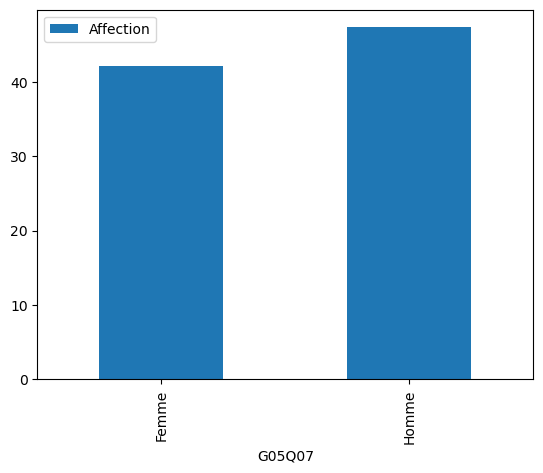

In [49]:
BFdata.groupby(["G05Q07"]).mean()[["Affection"]].plot(kind="bar")
plt.show()

In [50]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Affection"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Affection"], equal_var=False)

Ttest_indResult(statistic=-1.7435948672630366, pvalue=0.1279497629023032)

In [51]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Affection"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Affection"], equal_var=False, alternative="less")

Ttest_indResult(statistic=-1.7435948672630366, pvalue=0.0639748814511516)

In [52]:
stats.mannwhitneyu(BFdata[BFdata["G05Q07"] == "Femme"]["Affection"], BFdata[BFdata["G05Q07"] == "Homme"]["Affection"], method="exact", alternative="less")

MannwhitneyuResult(statistic=10.5, pvalue=0.07342657342657342)

#### Affection score per age group

In [53]:
BFdata.groupby(["Age_enco"]).describe()[["Affection"]]

Affection                                                 
                  count   mean       std   min    25%   50%    75%   max
Age_enco                                                                
<25 y.o             4.0  45.00  3.651484  41.0  42.50  45.0  47.50  49.0
25 to 40 y.o.       6.0  48.00  4.335897  42.0  46.00  47.0  51.75  53.0
>40 y.o.            4.0  42.25  7.041543  33.0  39.75  43.0  45.50  50.0

In [54]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Affection"], b=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Affection"], equal_var=False, alternative="less")

Ttest_indResult(statistic=-1.1797256364594217, pvalue=0.13737112797830212)

In [55]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Affection"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Affection"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=0.6933936125944304, pvalue=0.26108501957156527)

In [56]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Affection"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Affection"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=1.4591292690411193, pvalue=0.10506115827171213)

In [57]:
stats.kruskal(BFdata[BFdata["Age_enco"] == "<25 y.o"]["Affection"], BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Affection"], BFdata[BFdata["Age_enco"] == ">40 y.o."]["Affection"])

KruskalResult(statistic=1.9952986725663686, pvalue=0.36874521920380693)

#### Affection Score by technical group

In [58]:
BFdata.groupby(["G01Q12_encoded"]).describe()["Affection"]

,count,mean,std,min,25%,50%,75%,max
G01Q12_encoded,,,,,,,,
1,1.0,46.000000,NaN,46.0,46.0,46.0,46.0,46.0
2,3.0,39.666667,5.859465,33.0,37.5,42.0,43.0,44.0
3,5.0,45.400000,3.361547,41.0,43.0,46.0,48.0,49.0
4,5.0,49.000000,4.636809,42.0,47.0,50.0,53.0,53.0


In [59]:
stats.kruskal(BFdata.loc[BFdata["G01Q12_encoded"] ==2]['Affection'], BFdata.loc[BFdata["G01Q12_encoded"] ==3]['Affection'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Affection']  )

KruskalResult(statistic=4.561325966850827, pvalue=0.10221641645619577)

### Cognitive

In [60]:
BFdata["Cognitive"] = BFdata["G02Affection[SQ001]_encoded"] + BFdata["G03Cognitive[SQ001]_encoded"] + BFdata["G03Cognitive[SQ002]_encoded"] + BFdata["G03Cognitive[SQ003]_encoded"] + BFdata["G03Cognitive[SQ004]_encoded"] + BFdata["G03Cognitive[SQ005]_encoded"]

In [61]:
BFdata.describe()[["Cognitive"]]

,Cognitive
count,14.000000
mean,26.500000
std,1.743118
min,22.000000
25%,26.000000
50%,27.000000
75%,27.750000
max,29.000000


#### Cognitive by gender

In [62]:
BFdata.groupby(["G05Q07"]).describe()[["Cognitive"]]

Cognitive                                                   
           count       mean       std   min   25%   50%   75%   max
G05Q07                                                             
Femme        5.0  26.000000  2.345208  22.0  26.0  27.0  27.0  28.0
Homme        9.0  26.777778  1.394433  25.0  26.0  27.0  28.0  29.0

In [63]:
stats.ttest_ind(a=BFdata[BFdata["G05Q07"] == "Femme"]["Cognitive"], b=BFdata[BFdata["G05Q07"] == "Homme"]["Cognitive"], equal_var=False)

Ttest_indResult(statistic=-0.677983988697803, pvalue=0.5247072238131596)

In [64]:
stats.mannwhitneyu(BFdata[BFdata["G05Q07"] == "Femme"]["Cognitive"], BFdata[BFdata["G05Q07"] == "Homme"]["Cognitive"], method="exact", alternative="less")

MannwhitneyuResult(statistic=20.0, pvalue=0.3986013986013986)

#### Cognitive score per age group

In [65]:
BFdata.groupby(["Age_enco"]).describe()[["Cognitive"]]

Cognitive                                                
                  count  mean       std   min    25%   50%    75%   max
Age_enco                                                               
<25 y.o             4.0  27.5  1.732051  25.0  27.25  28.0  28.25  29.0
25 to 40 y.o.       6.0  26.5  0.836660  25.0  26.25  27.0  27.00  27.0
>40 y.o.            4.0  25.5  2.516611  22.0  25.00  26.0  26.50  28.0

In [66]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Cognitive"], b=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Cognitive"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=1.0741723110591492, pvalue=0.17197760855775082)

In [67]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "<25 y.o"]["Cognitive"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Cognitive"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=1.3093073414159544, pvalue=0.12205761761636996)

In [68]:
stats.ttest_ind(a=BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Cognitive"], b=BFdata[BFdata["Age_enco"] == ">40 y.o."]["Cognitive"], equal_var=False, alternative="greater")

Ttest_indResult(statistic=0.7669649888473704, pvalue=0.24611467655526986)

In [69]:
stats.kruskal(BFdata[BFdata["Age_enco"] == "<25 y.o"]["Cognitive"], BFdata[BFdata["Age_enco"] == "25 to 40 y.o."]["Cognitive"], BFdata[BFdata["Age_enco"] == ">40 y.o."]["Cognitive"])

KruskalResult(statistic=2.495890672782881, pvalue=0.2870940730148021)

#### Cognitive Score by technical group

In [70]:
BFdata.groupby(["G01Q12_encoded"]).describe()["Cognitive"]

,count,mean,std,min,25%,50%,75%,max
G01Q12_encoded,,,,,,,,
1,1.0,27.000000,NaN,27.0,27.0,27.0,27.0,27.0
2,3.0,24.666667,2.309401,22.0,24.0,26.0,26.0,26.0
3,5.0,27.200000,1.483240,25.0,27.0,27.0,28.0,29.0
4,5.0,26.800000,1.303840,25.0,26.0,27.0,28.0,28.0


In [71]:
stats.kruskal(BFdata.loc[BFdata["G01Q12_encoded"] ==2]['Cognitive'], BFdata.loc[BFdata["G01Q12_encoded"] ==3]['Cognitive'], BFdata.loc[BFdata["G01Q12_encoded"] ==4]['Cognitive']  )

KruskalResult(statistic=3.1339031339031265, pvalue=0.20868036182563704)

### Attitude level

In [72]:
BFdata["GCASLevel"] = pd.cut(BFdata["Score"],bins=[0,115.75,127.75,150],labels=['negative','neutral','positive'])

#### Attitude level by age

In [73]:
BFdata.groupby(["GCASLevel"]).describe()[['G01Q08']]

G01Q08                                                      
           count       mean        std   min    25%   50%    75%   max
GCASLevel                                                             
negative     4.0  43.250000  13.961256  23.0  39.50  48.5  52.25  53.0
neutral      6.0  32.166667   7.704977  23.0  27.50  31.5  34.75  45.0
positive     4.0  27.500000   5.567764  22.0  24.25  26.5  29.75  35.0

#### Attitude level by technical experience level

In [74]:
BFdata.groupby(["GCASLevel"]).describe()[[ 'G01Q12_encoded']]

G01Q12_encoded                                               
                   count      mean       std  min   25%  50%   75%  max
GCASLevel                                                              
negative             4.0  2.750000  0.957427  2.0  2.00  2.5  3.25  4.0
neutral              6.0  2.666667  1.032796  1.0  2.25  3.0  3.00  4.0
positive             4.0  3.750000  0.500000  3.0  3.75  4.0  4.00  4.0

#### Attitude level by gender

In [75]:
pd.crosstab(BFdata["GCASLevel"], BFdata["G05Q07"] )

G05Q07,Femme,Homme
GCASLevel,,
negative,2,2
neutral,3,3
positive,0,4


## Export Data

In [76]:
BFdata.to_csv("2023-09-06-step1-rawdata-clean-extended.csv", index=False)